<a href="https://colab.research.google.com/github/ffviana/NUTRECON/blob/main/FractalPairing_Pilot/Data%20Analysis/Colab%20Notebooks/generate_SubjectbySubject_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pickle
import json
import numpy as np
import pandas as pd
from glob import glob
from random import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import seaborn as sns

base_folder = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/1. DataAcquisition/ExperimentsRoom'
subjectFigures_folder = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/3. Analyses/Subject_by_Subject_plots'

sequenceFolder = base_folder + '/SitmulusPresentationSequence'
AssTestFolder = base_folder + '/AssociationTask_ExperimentsRoom'

fractalDecoder = {0: 'Fractal I',
                  1: 'Fractal II',
                  2: 'Fractal III',
                  3: 'Fractal IV',
                  4: 'Fractal V',
                  5: 'Fractal VI'
                  }

def bold(text):
  return '\033[1m' + text + '\033[0m'

def printFiles(sequenceFolder, AssTestFolder, Subject_code):
  path_sequence_ = glob('{}/{}*.npy'.format(sequenceFolder, Subject_code) )
  path_AssTest_ = glob('{}/{}*'.format(AssTestFolder, Subject_code) )
  sequence_files = [p.split('/')[-1] for p in path_sequence_]
  AssTest_files = [p.split('/')[-1] for p in path_AssTest_ if not 'misClicks' in p]

  print(bold('Sequence Files for subject {}:'.format(Subject_code)))
  for p in sequence_files:
    print('\t- {}'.format(p))
    
  print('\n')
  print(bold('Association Test Files for subject {}:'.format(Subject_code)))
  for p in AssTest_files:
    print('\t- {}'.format(p))
  
  return

def reportAndConfusionMatrix(Sequence, Answers, flavorFractal_code = False):

  targetNames = [fractalDecoder[p] for p in list(set(Sequence + Answers))]

  report = classification_report(Sequence, Answers, 
              target_names = targetNames, zero_division = 0, output_dict = True)
  print('\t\t\t\033[1mAccuracy:\033[0m {}'.format(report['accuracy']))

  #classification_report(Sequence, Answers, target_names = targetNames, zero_division = 0, output_dict = True)

  #print(classification_report(Sequence, Answers, target_names = targetNames, 
  #      zero_division = 0).replace('precision','True Neg.')
  #     .replace('recall','sensitivity')
  #     .replace('support','Trials')
  #     .split('macro')[0])
  fractal_labels = fractalDecoder.values()
  flavor_labels = [flavorFractal_code[p] for p in fractal_labels]

  fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=90)
  mat = confusion_matrix(Sequence, Answers, labels = np.arange(6))
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, ax = ax)
  rect = Rectangle((.5,0),np.sqrt(2*5.5**2),np.sqrt(2)/2, ec='green', lw = 4, fc = 'none', angle = 45)

  ax.tick_params( direction = 'inout' )
  ax.set_xlabel('Correct Factal')
  ax.set_ylabel('Subject Choice')
  ax.set_yticklabels(list(fractalDecoder.values()), rotation=0);
  ax.set_xticklabels(list(fractalDecoder.values()), rotation=30, ha='right');
  ax.add_patch(rect);

  flavors = [flavorFractal_code[p] for p in list(fractalDecoder.values())]
  
  ax_t = ax.secondary_xaxis('top')
  ax_t.tick_params(axis='x', direction='inout')
  ax_t.set_xticks(ax.get_xticks())
  ax_t.set_xticklabels(flavors, rotation=30, ha='left');

  ax_r = ax.secondary_yaxis('right')
  ax_r.tick_params(axis='y', direction='inout')
  ax_r.set_yticks(ax.get_yticks())
  ax_r.set_yticklabels(flavors, rotation=0);

  return fig

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
registery_fname = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/2. Databases/subjectFiles_registration.json'
  
# Read Registery
with open(registery_fname) as json_file:
  registery = json.load(json_file)

		ercffa_001 - Association Test 1
			Accuracy: 0.25
		ercffa_001 - Association Test 2
			Accuracy: 0.08333333333333333
		ercffa_002 - Association Test 1
			Accuracy: 0.5
		ercffa_002 - Association Test 2
			Accuracy: 0.25
		ercffa_004 - Association Test 1
			Accuracy: 1.0
		ercffa_004 - Association Test 2
			Accuracy: 0.9444444444444444
		ercffa_004 - Association Test 3
			Accuracy: 0.9444444444444444
		ercffa_005 - Association Test 1
			Accuracy: 0.7222222222222222
		ercffa_005 - Association Test 2
			Accuracy: 0.7777777777777778
		ercffa_005 - Association Test 3
			Accuracy: 0.6111111111111112
		ercffa_007 - Association Test 1
			Accuracy: 0.375
		ercffa_007 - Association Test 2
			Accuracy: 0.4583333333333333
		ercffa_007 - Association Test 3
			Accuracy: 0.375
		ercffa_008 - Association Test 1
			Accuracy: 0.16666666666666666
		ercffa_008 - Association Test 2
			Accuracy: 0.16666666666666666
		ercffa_009 - Association Test 1
			Accuracy: 0.2916666666666667
		ercffa_009 - Associatio

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_013 - Association Test 1
			Accuracy: 0.8333333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_013 - Association Test 2
			Accuracy: 0.7777777777777778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_013 - Association Test 3
			Accuracy: 0.7777777777777778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_014 - Association Test 1
			Accuracy: 0.6944444444444444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_014 - Association Test 2
			Accuracy: 0.4166666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_014 - Association Test 3
			Accuracy: 0.5277777777777778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_015 - Association Test 1
			Accuracy: 0.4166666666666667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_015 - Association Test 2
			Accuracy: 0.5277777777777778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_015 - Association Test 3
			Accuracy: 0.4722222222222222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_016 - Association Test 1
			Accuracy: 0.5277777777777778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_016 - Association Test 2
			Accuracy: 0.5555555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_016 - Association Test 3
			Accuracy: 0.6111111111111112


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_017 - Association Test 1
			Accuracy: 0.3333333333333333


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_017 - Association Test 2
			Accuracy: 0.3055555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_018 - Association Test 1
			Accuracy: 0.75


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_018 - Association Test 2
			Accuracy: 0.5833333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_018 - Association Test 3
			Accuracy: 0.1111111111111111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_019 - Association Test 1
			Accuracy: 0.7222222222222222


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_019 - Association Test 2
			Accuracy: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_019 - Association Test 3
			Accuracy: 0.9166666666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_020 - Association Test 1
			Accuracy: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_020 - Association Test 2
			Accuracy: 0.6944444444444444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_020 - Association Test 3
			Accuracy: 0.5555555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_021 - Association Test 1
			Accuracy: 0.2777777777777778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_021 - Association Test 2
			Accuracy: 0.3611111111111111


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_022 - Association Test 1
			Accuracy: 0.5555555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_022 - Association Test 2
			Accuracy: 0.8055555555555556


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


		ercffa_022 - Association Test 3
			Accuracy: 0.6666666666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


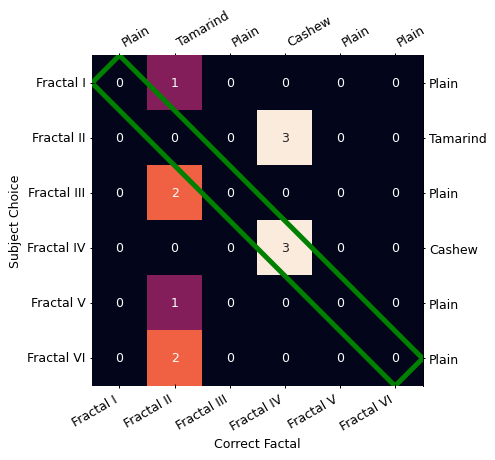

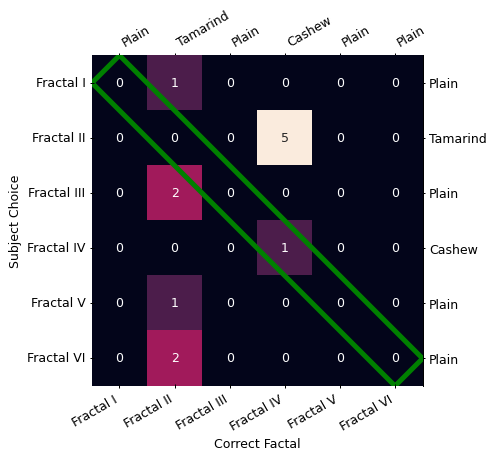

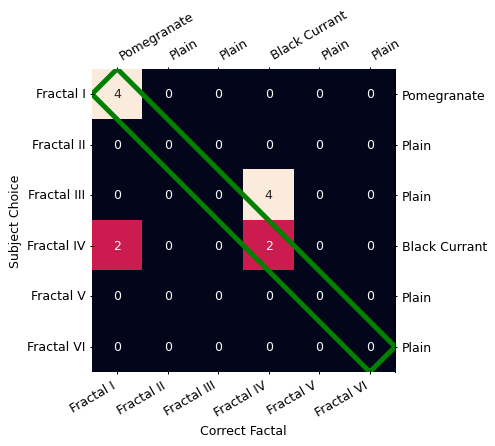

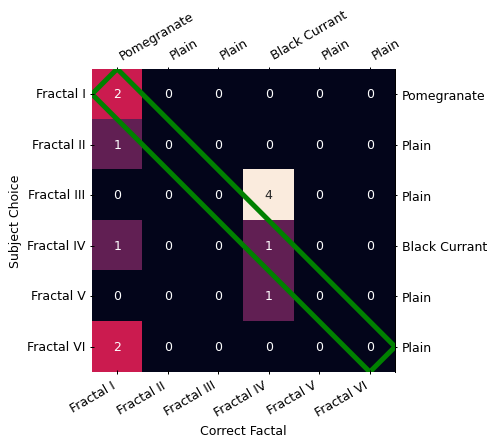

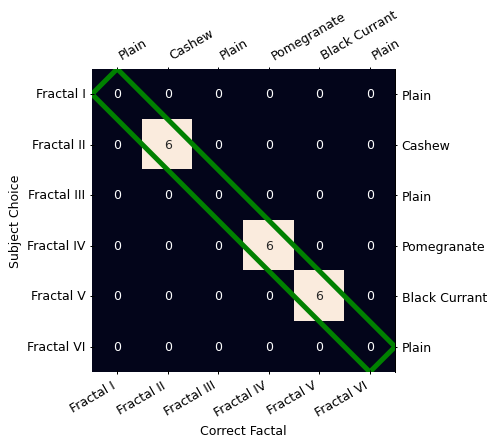

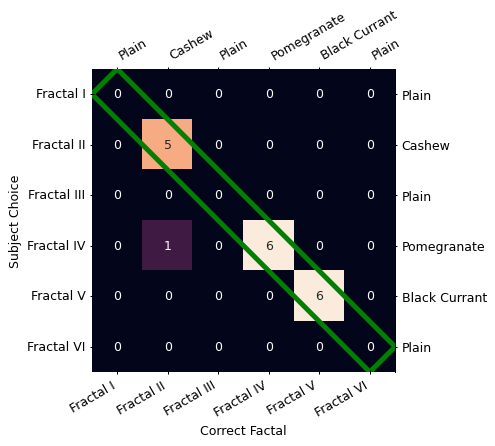

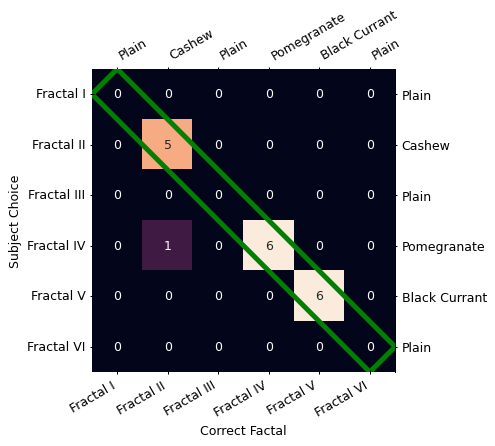

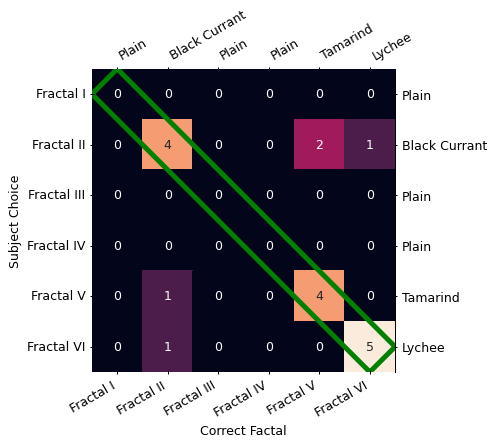

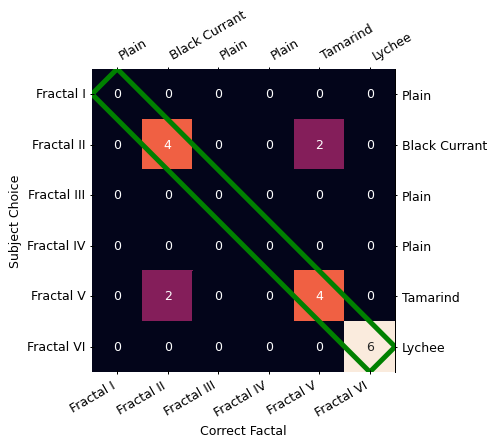

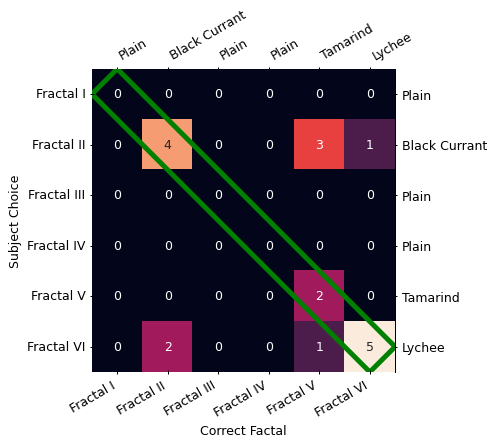

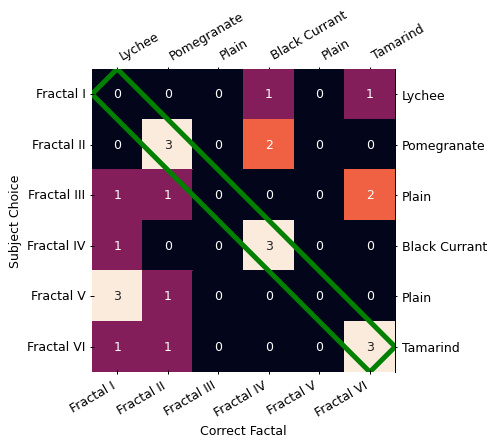

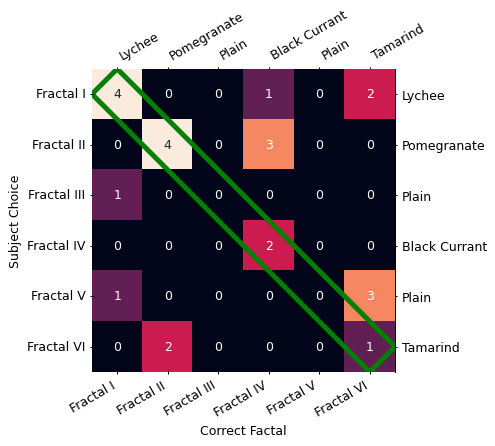

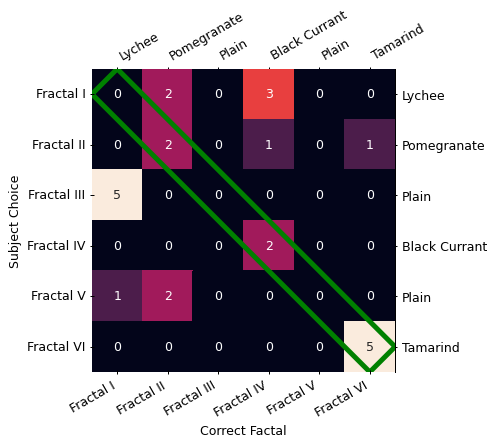

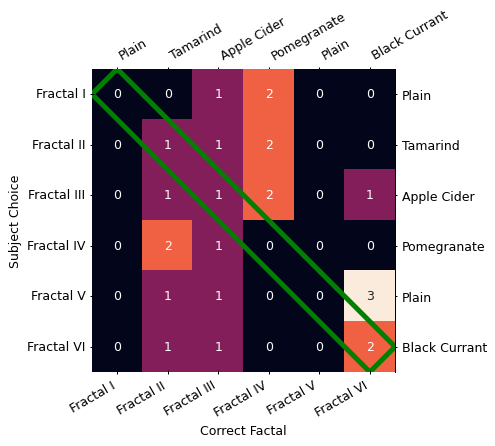

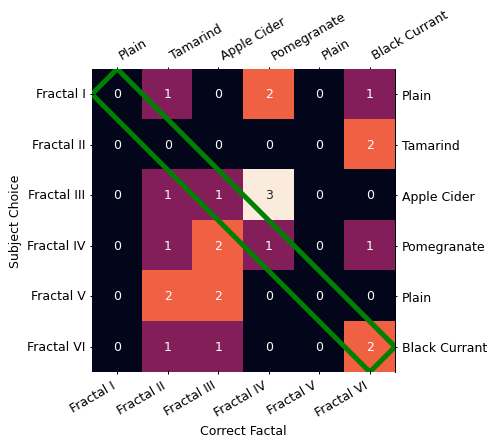

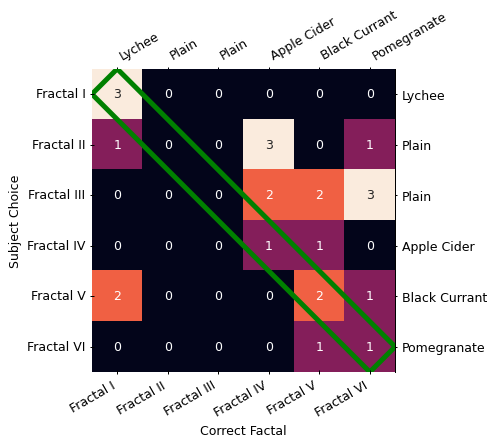

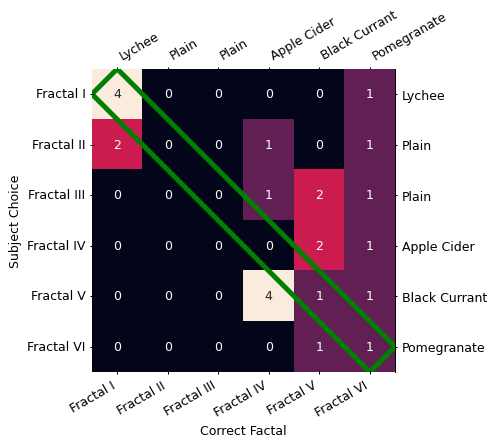

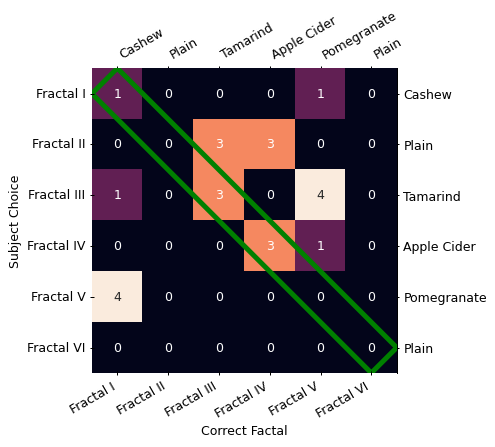

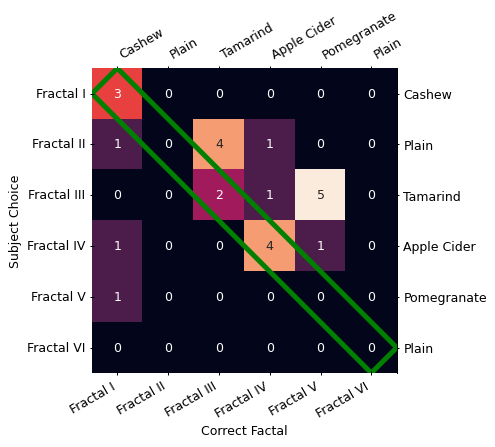

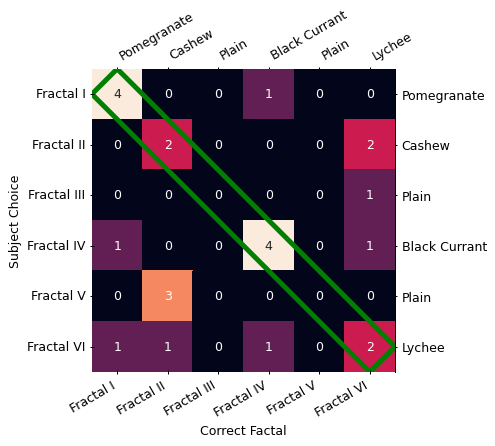

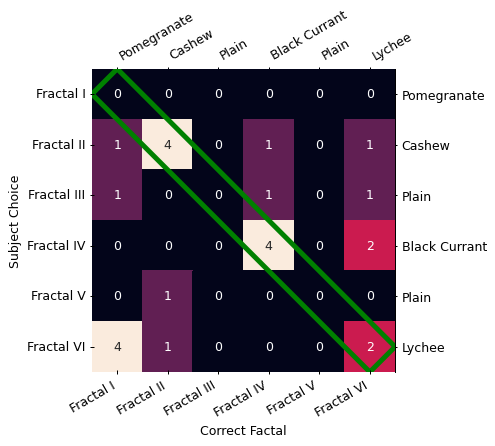

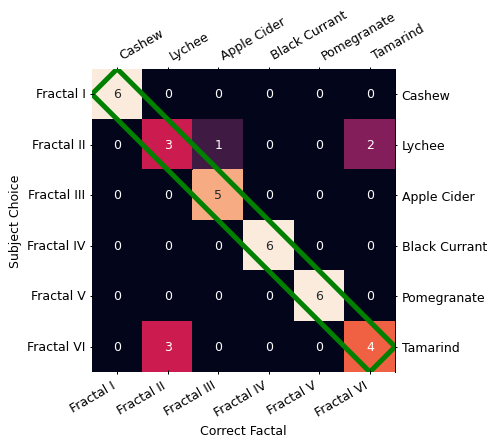

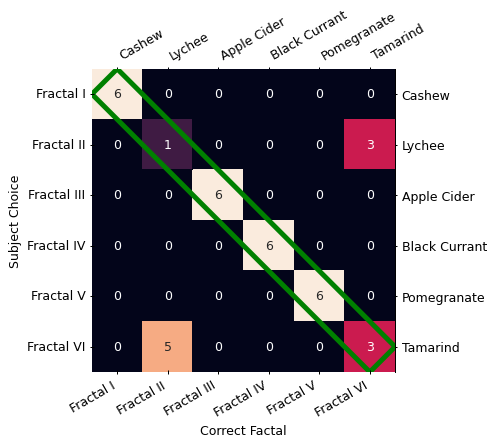

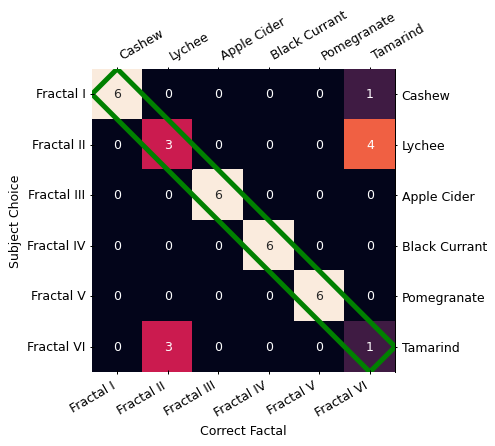

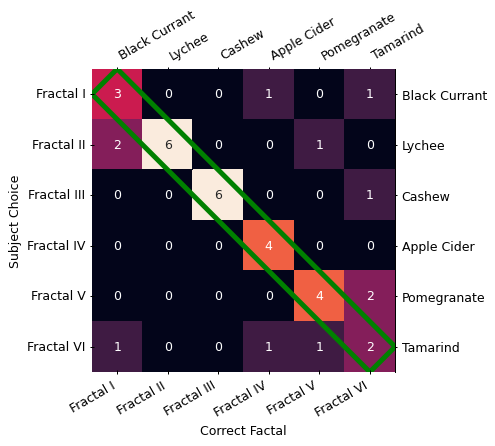

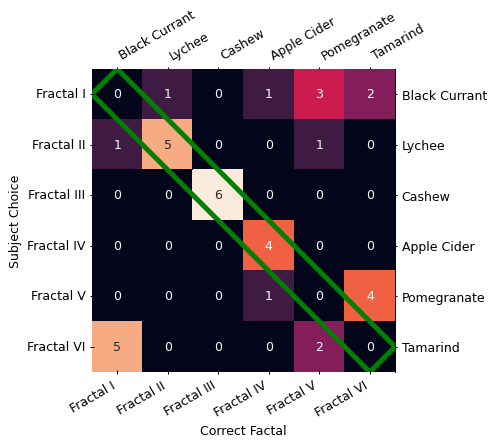

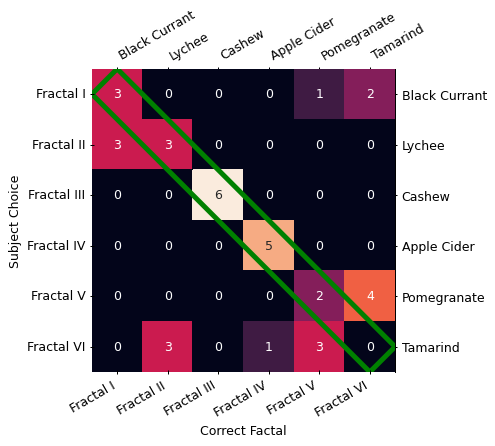

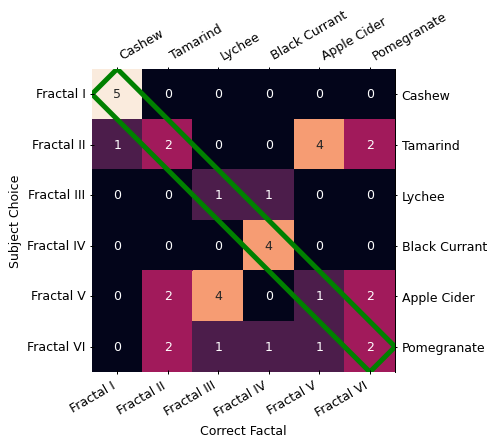

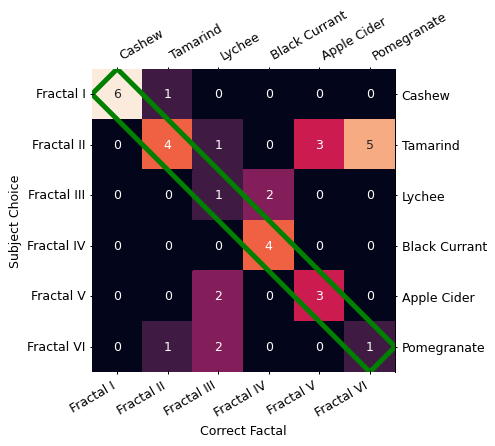

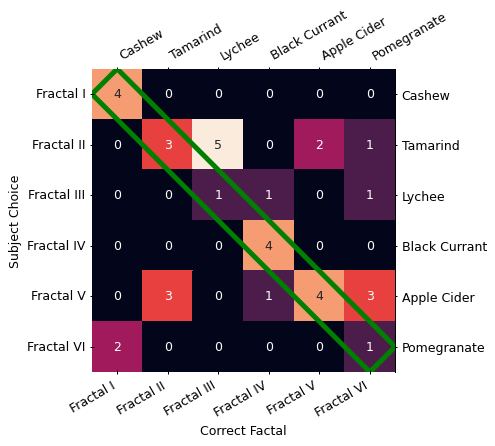

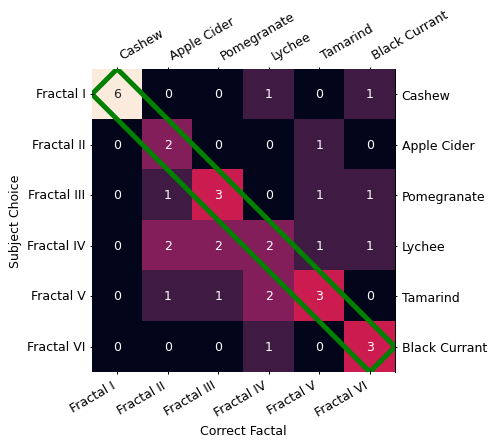

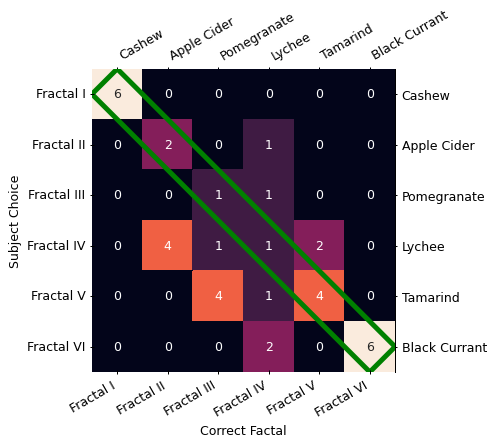

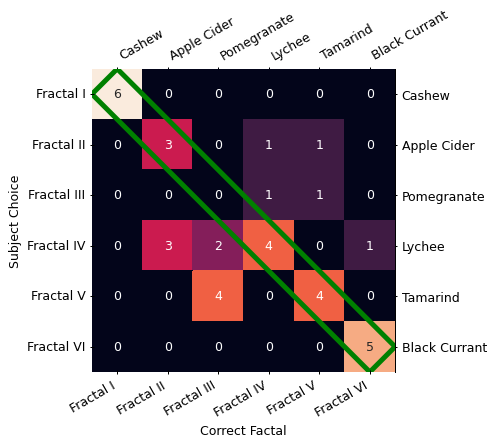

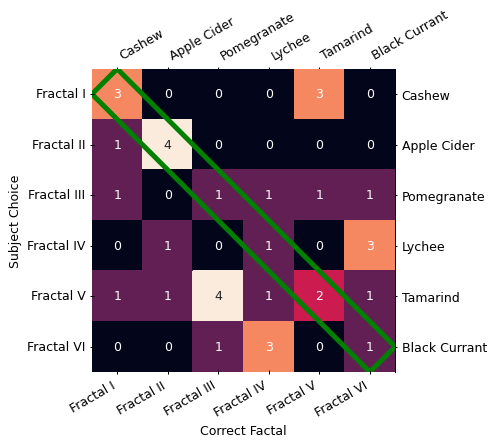

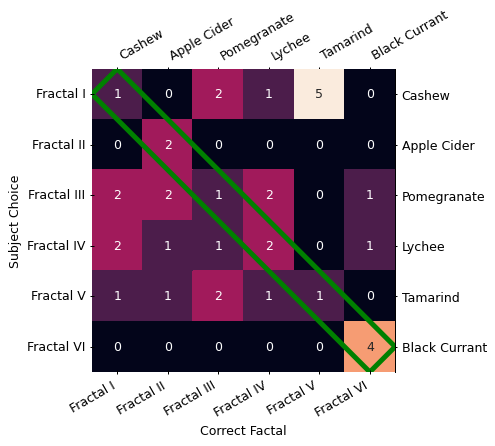

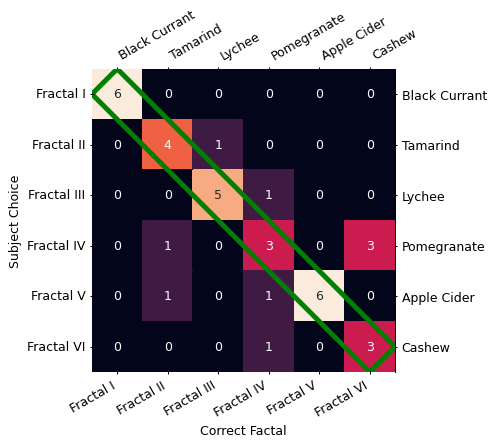

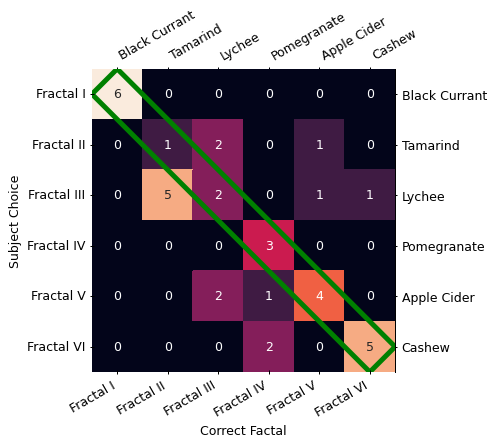

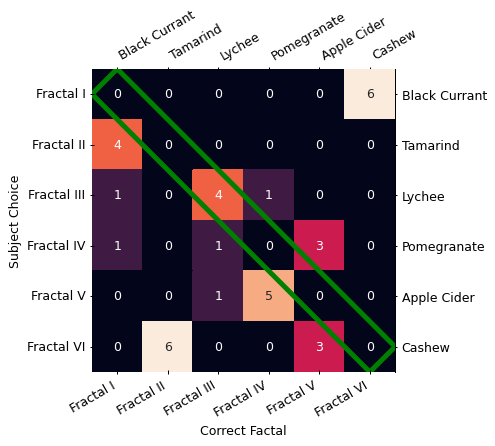

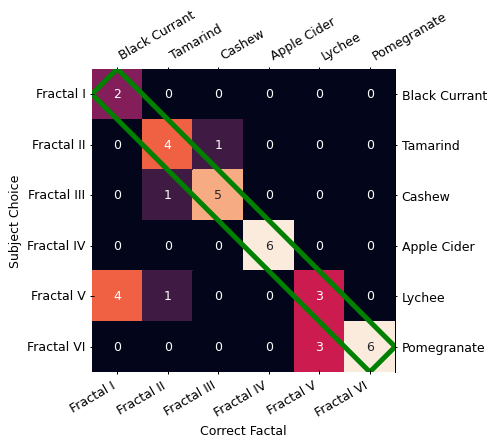

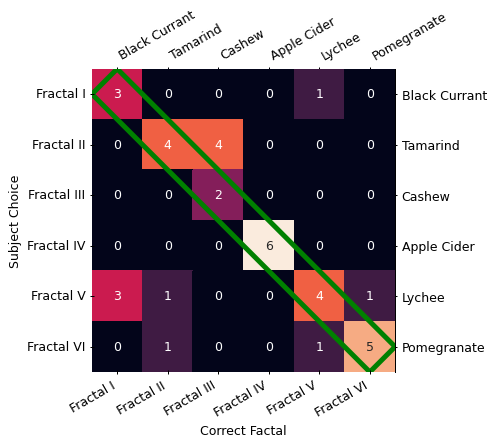

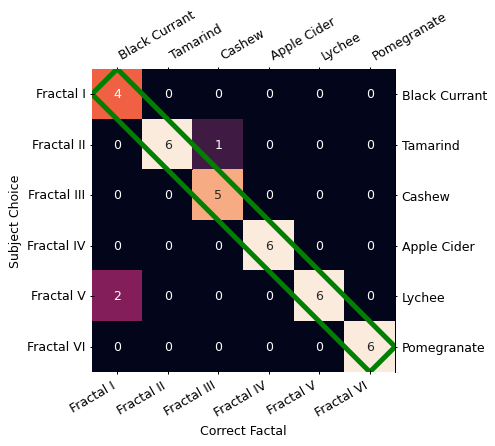

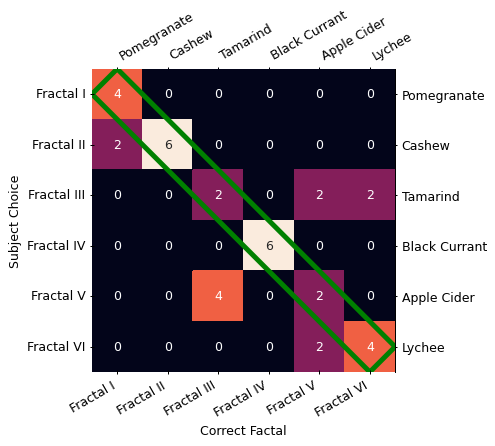

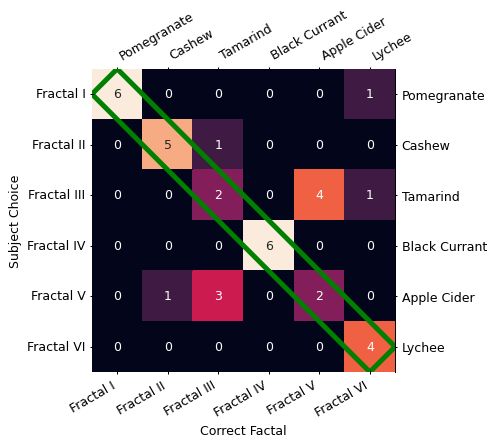

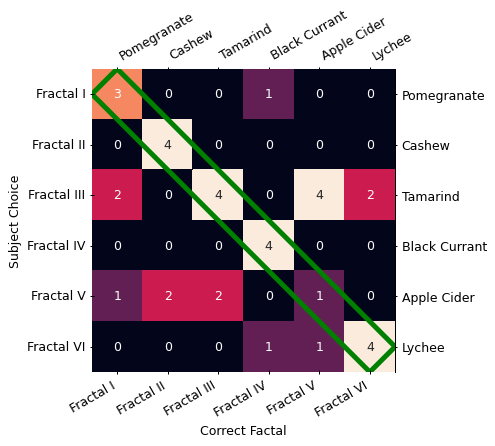

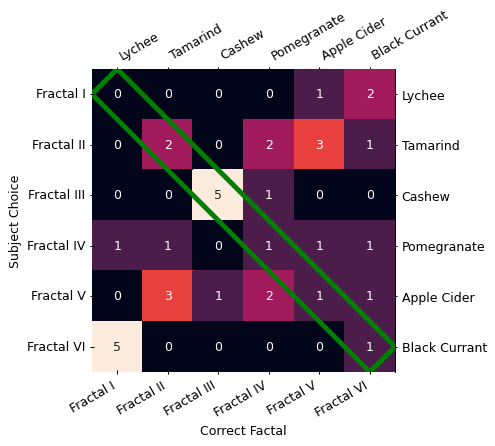

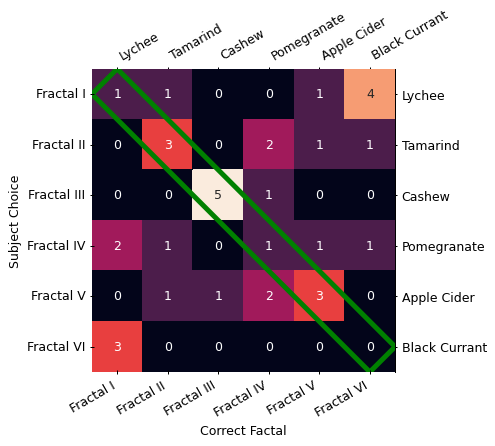

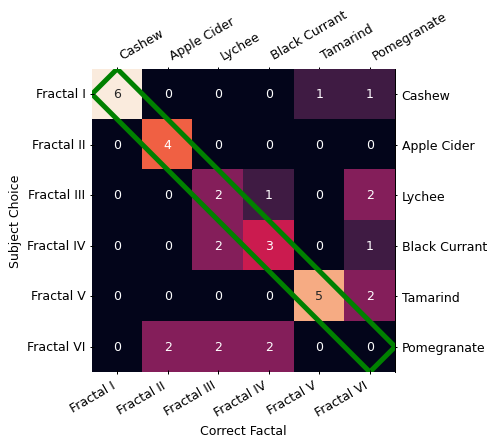

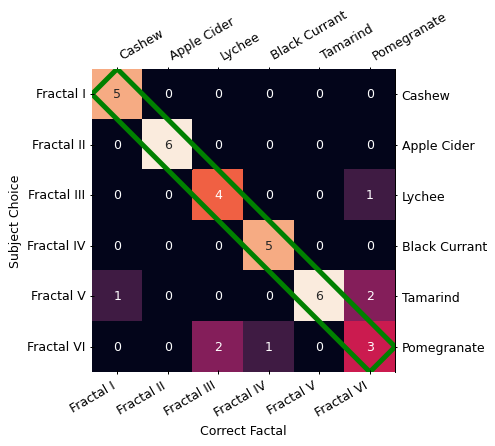

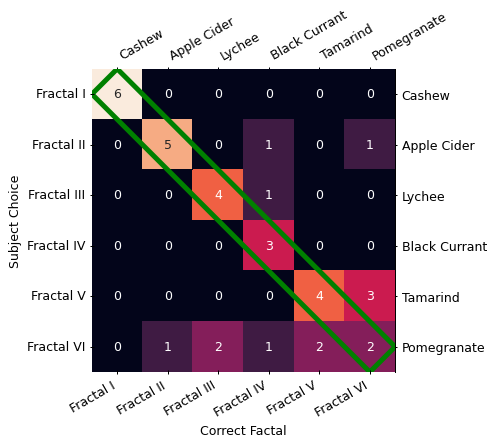

In [6]:


for sub_id in registery.keys():
  sub_registery = registery[sub_id]
  Sequence_File = sub_registery['sequence']
  Sequence_Data = np.load('{}/{}'.format(sequenceFolder, Sequence_File), 
                        allow_pickle=True).item()
  flavorFractal = Sequence_Data['Flavor-Fractal pairs'].drop(columns=['Flavor_code']).to_dict(orient = 'index')
  flavorFractal_code = {'Fractal {}'.format(key):flavorFractal[key]['Flavor'] for key, value in flavorFractal.items()}
  for p in range(1,len(registery[sub_id].keys())):
    test_seq = 'Association Test {}'.format(p)
    print('\t\t{} - {}'.format(sub_id, test_seq))
    Sequence = Sequence_Data[test_seq]['fractal'].tolist()
    Association_File = sub_registery['association_{}'.format(p)]

    Answers = pd.read_json('{}/{}'.format(AssTestFolder, Association_File))['Fractal ID'].tolist()
  
    figname = '{}/confusionMatrix_{}_association_{}.png'.format(subjectFigures_folder, sub_id, p)
    reportAndConfusionMatrix(Sequence, Answers, flavorFractal_code)
    plt.tight_layout()
    plt.savefig(figname)


In [ ]:
for sub_id in registery.keys():
  print(sub_id)
  sub_registery = registery[sub_id]
  Sequence_File = sub_registery['sequence']
  Sequence_Data = np.load('{}/{}'.format(sequenceFolder, Sequence_File), 
                        allow_pickle=True).item()
  print(Sequence_Data['Learning Order'])
  print('-'*50)
  print()




ercffa_001
      Fractal Flavor_code    Flavor
Order                              
1          II           f  Tamarind
2           I           g     Plain
3           V           g     Plain
4          VI           g     Plain
5         III           g     Plain
6          IV           c    Cashew
--------------------------------------------------

ercffa_002
      Fractal Flavor_code         Flavor
Order                                   
1           I           e    Pomegranate
2          IV           b  Black Currant
3          VI           g          Plain
4         III           g          Plain
5          II           g          Plain
6           V           g          Plain
--------------------------------------------------

ercffa_004
      Fractal Flavor_code         Flavor
Order                                   
1          II           c         Cashew
2           I           g          Plain
3          IV           e    Pomegranate
4           V           b  Black Currant
5